In [2]:
test_mode = False

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
root_dir = 'D:/OpenClassrooms/projet_5'
dataset_name = 'df_final_4'

In [5]:
# for bigger plots
scale_factor = 2

default_size = [6.0, 4.0]
scaled_size = [scale_factor * n for n in default_size]
plt.rcParams['figure.figsize'] = scaled_size


# to see all columns when looking at a dataframe
pd.set_option('display.max_columns', None)

In [6]:
data_path = root_dir + '/data/' + dataset_name + '.csv'
df = pd.read_csv(data_path)

test_mode_samples = 10000
if test_mode:
    df = df.sample(test_mode_samples)
    

print(df.shape)
df.head()

(92456, 25)


,customer_unique_id,M,freight_value,R,nb_days_order_approved,nb_days_delivered_carrier,nb_days_delivered_customer,nb_days_estimate_delivery,payment_sequential,payment_installments,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,payment_value,review_score,review_title,review_message,nb_days_survey_respond,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,F
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,12.00,601,0.0,1.0,6.0,10.0,1.0,8.0,0,1,0,0,141.90,5.0,1,1,4.0,7787.0,cajamar,SP,-23.340262,-46.831085,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,8.29,598,0.0,2.0,3.0,7.0,1.0,1.0,0,1,0,0,27.19,4.0,0,0,0.0,6053.0,osasco,SP,-23.559044,-46.788516,1
2,0000f46a3911fa3c0805444483337064,69.00,17.22,176,0.0,2.0,25.0,27.0,1.0,8.0,0,1,0,0,86.22,3.0,0,0,1.0,88115.0,sao jose,SC,-27.542763,-48.635001,1
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,17.63,392,0.0,0.0,20.0,31.0,1.0,4.0,0,1,0,0,43.62,4.0,0,1,1.0,66812.0,belem,PA,-1.312726,-48.482748,1
4,0004aac84e0df4da2b147fca70cf8255,180.00,16.89,425,0.0,2.0,13.0,20.0,1.0,6.0,0,1,0,0,196.89,5.0,0,0,4.0,18040.0,sorocaba,SP,-23.505670,-47.469837,1


In [7]:
for column in df.columns:
    print(column)

customer_unique_id
M
freight_value
R
nb_days_order_approved
nb_days_delivered_carrier
nb_days_delivered_customer
nb_days_estimate_delivery
payment_sequential
payment_installments
pay_boleto
pay_credit_card
pay_debit_card
pay_voucher
payment_value
review_score
review_title
review_message
nb_days_survey_respond
zip_code_prefix
customer_city
customer_state
geolocation_lat
geolocation_lng
F


In [8]:
# make subset of the final dataframe for clustering with a model
'''
to_drop = ['customer_unique_id', 
           'zip_code_prefix', 
           'customer_city', 
           'customer_state', 
           'freight_value', 
           'nb_days_order_approved', 
           'nb_days_delivered_carrier', 
           'nb_days_estimate_delivery', 
           'payment_sequential', 
           'payment_installments', 
           'pay_boleto', 
           'pay_credit_card', 
           'pay_debit_card', 
           'pay_voucher', 
           'payment_value'
          ]
'''
'''
# k=3
to_drop = ['customer_unique_id', 
           'zip_code_prefix', 
           'customer_city', 
           'customer_state', 
           'geolocation_lat', 
           'geolocation_lng', 
           
           'freight_value', 
           
           'nb_days_order_approved', 
           'nb_days_delivered_carrier', 
           'nb_days_estimate_delivery', 
           
           'payment_sequential', 
           'payment_installments', 
           'pay_boleto', 
           'pay_credit_card', 
           'pay_debit_card', 
           'pay_voucher', 
           'payment_value', 
           
           'review_title', 
           'review_message'
          ]
'''
'''
to_drop = ['customer_unique_id', 
           'zip_code_prefix', 
           'customer_city', 
           'customer_state', 
           'geolocation_lat', 
           'geolocation_lng', 
           'freight_value', 
           'nb_days_order_approved', 
           'nb_days_delivered_carrier', 
           'nb_days_estimate_delivery', 
           'payment_sequential', 
           'payment_value'
          ]
'''

#k=6
to_drop = ['customer_unique_id', 
           'zip_code_prefix', 
           'customer_city', 
           'customer_state', 
          ]


'''
to_drop = ['customer_unique_id', 
           'zip_code_prefix', 
           'customer_city', 
           'customer_state', 
           
           'nb_days_order_approved', 
           'nb_days_delivered_carrier', 
           'payment_value', 
           
           'nb_days_survey_respond', 
           'review_score', 
           'review_title', 
           'review_message',
          ]
'''
'''
k=6
to_keep = ['R', 
           'F', 
           'M', 
           'review_title', 
           'review_message'
          ]
'''
'''
#k=2/5/7
to_keep = ['R', 
           'F', 
           'M', 
           'review_title', 
           'review_message', 
           'payment_installments', 
           'payment_sequential', 
          ]
'''

#k=4
to_keep = ['R', 
           'F', 
           'M', 
           'review_title', 
           'review_message', 
           'payment_installments', 
           'payment_sequential', 
           'nb_days_survey_respond', 
           'pay_boleto', 
           'pay_credit_card', 
           'pay_debit_card', 
           'pay_voucher', 
           'freight_value', 
           'payment_value'
          ]

#data = df.drop(to_drop, axis=1)
data = df[to_keep]


print(data.shape)
data.head()

(92456, 14)


,R,F,M,review_title,review_message,payment_installments,payment_sequential,nb_days_survey_respond,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,freight_value,payment_value
0,601,1,129.90,1,1,8.0,1.0,4.0,0,1,0,0,12.00,141.90
1,598,1,18.90,0,0,1.0,1.0,0.0,0,1,0,0,8.29,27.19
2,176,1,69.00,0,0,8.0,1.0,1.0,0,1,0,0,17.22,86.22
3,392,1,25.99,0,1,4.0,1.0,1.0,0,1,0,0,17.63,43.62
4,425,1,180.00,0,0,6.0,1.0,4.0,0,1,0,0,16.89,196.89


In [9]:
# prepare data for model (convert to numpy and normalize)
X = data.to_numpy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X.shape ,'\n')
print(X[0])

(92456, 14) 

[ 0.82326458 -0.1591073  -0.05333594  2.72010709  1.20045096  1.85505353
 -0.05677826  0.14487706 -0.4914476   0.4253142  -0.12603482 -0.13550792
 -0.28896628 -0.10212171]


# Finding optimal clusters

In [11]:
# choose model and score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
# choose number of clusters
k_range = [2, 10]
K = np.arange(k_range[0], k_range[1]+1)
print('K =', K, '\n')

K = [ 2  3  4  5  6  7  8  9 10] 



In [11]:
# get score on multiple numbers of clusters
silhouettes = []
for k in K:
    model = KMeans(n_clusters=k, random_state=0)
    pred = model.fit_predict(X)
    silhouettes.append(silhouette_score(X, pred))

for k, s in zip(K, silhouettes):
    print(k, ':', s)

2 : 0.31519306774158334
3 : 0.32780260306349124
4 : 0.3526249849919863
5 : 0.35662329034979295
6 : 0.3599166113033352
7 : 0.30650248633864596
8 : 0.32257015534754246
9 : 0.326201534179732
10 : 0.33161857411373236


In [12]:
def elbow_graph(K, silhouettes):
    plt.figure()
    plt.xlabel('k')
    plt.ylabel('silhouette')
    plt.plot(K, silhouettes, marker='o', color='b')
    plt.xticks(np.arange(min(K), max(K)+1, 1))
    plt.show()
    
    print()

    silhouettes_diff = []
    for i in range(len(silhouettes)-1):
        silhouettes_diff.append(silhouettes[i+1] - silhouettes[i])
    plt.figure()
    plt.xlabel('k')
    plt.ylabel('silhouette change')
    K_without_first = np.delete(K, 0)
    sns.barplot(x=K_without_first, y=silhouettes_diff, color='b')
    plt.show()

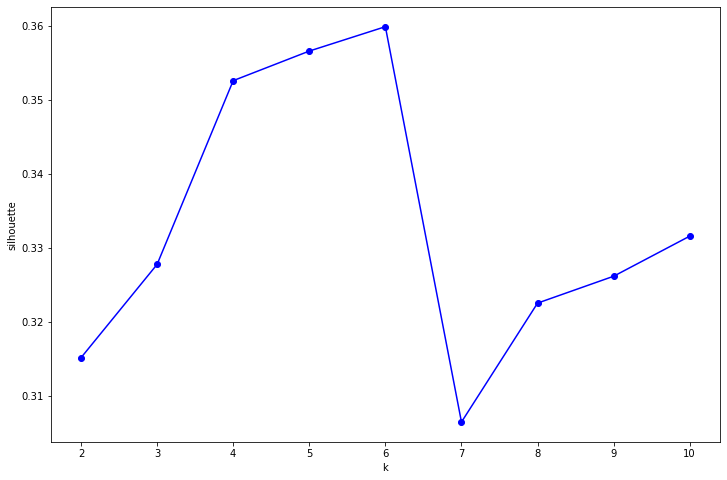

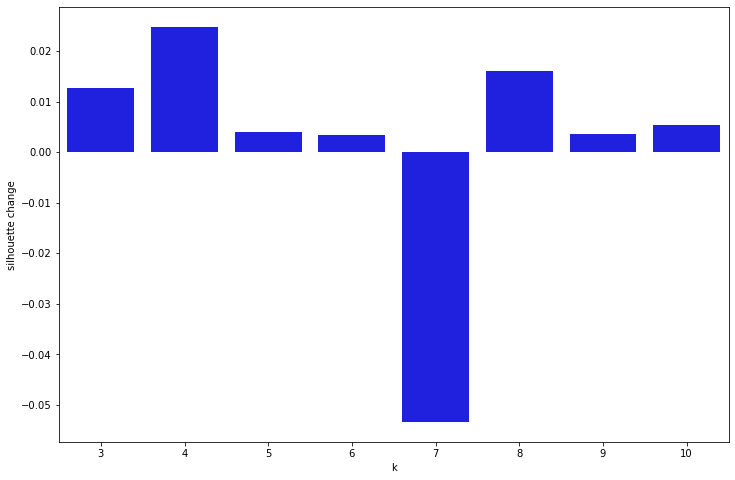

In [13]:
elbow_graph(K, silhouettes)

# Choose optimal number of clusters

In [12]:
k_opti = 4

# get predictions
model = KMeans(n_clusters=k_opti, random_state=0)
pred = model.fit_predict(X)
data['pred'] = pred
df['pred'] = pred

# population of each cluster
print(data['pred'].value_counts())

0    61585
1    17316
3    10571
2     2984
Name: pred, dtype: int64


C:\Users\Vincent\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Visualisation of optimal clusters

In [13]:
# select columns to graph
types = ['int64', 'float64']

to_graph = []
for column in df:
    print(column, ':', df[column].dtypes)
    if df[column].dtypes in types:
        to_graph.append(column)

customer_unique_id : object
M : float64
freight_value : float64
R : int64
nb_days_order_approved : float64
nb_days_delivered_carrier : float64
nb_days_delivered_customer : float64
nb_days_estimate_delivery : float64
payment_sequential : float64
payment_installments : float64
pay_boleto : int64
pay_credit_card : int64
pay_debit_card : int64
pay_voucher : int64
payment_value : float64
review_score : float64
review_title : int64
review_message : int64
nb_days_survey_respond : float64
zip_code_prefix : float64
customer_city : object
customer_state : object
geolocation_lat : float64
geolocation_lng : float64
F : int64
pred : int32


In [14]:
df_graph = df[to_graph]
df_graph = df_graph.drop('zip_code_prefix', axis=1)
df_graph['pred'] = pred
print(df_graph.shape)

(92456, 22)


In [15]:
# clusters means
df_graph_agg = df_graph.groupby('pred', as_index=False).agg(np.mean)
df_graph_agg.head()

,pred,M,freight_value,R,nb_days_order_approved,nb_days_delivered_carrier,nb_days_delivered_customer,nb_days_estimate_delivery,payment_sequential,payment_installments,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,payment_value,review_score,review_title,review_message,nb_days_survey_respond,geolocation_lat,geolocation_lng,F
0,0,114.167418,23.970367,454.613429,0.099253,2.505050,12.016319,23.403881,1.138134,3.338126,0.000325,1.009418,0.000260,0.071511,135.653802,4.177446,0.000000,0.345393,2.538881,-21.248207,-46.134109,1.027101
1,1,104.831105,25.191130,449.974705,0.841534,3.592227,13.031070,23.537278,1.002310,1.003436,0.960903,0.006641,0.065027,0.001213,126.650808,4.184329,0.003465,0.354585,2.514755,-21.432595,-46.562972,1.033495
2,2,983.422701,119.274863,468.518432,0.303452,3.719672,13.957272,25.777983,1.971515,6.920576,0.129692,1.018097,0.007708,0.157842,1056.051404,3.969044,0.126340,0.491622,2.512735,-19.700464,-45.902160,1.152480
3,3,121.742519,28.145820,639.987608,0.268045,2.301391,10.114038,22.000851,1.093416,2.873664,0.183899,0.807776,0.029515,0.051367,146.246468,4.014631,1.000000,0.851102,2.971715,-20.903467,-46.003878,1.034245


M :


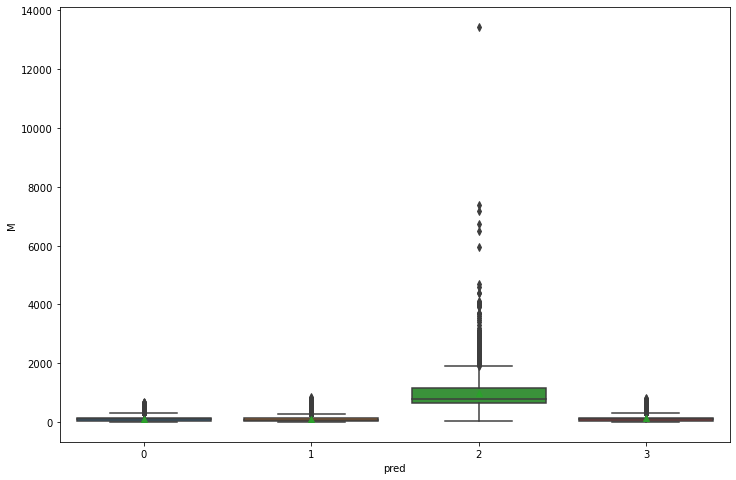





freight_value :


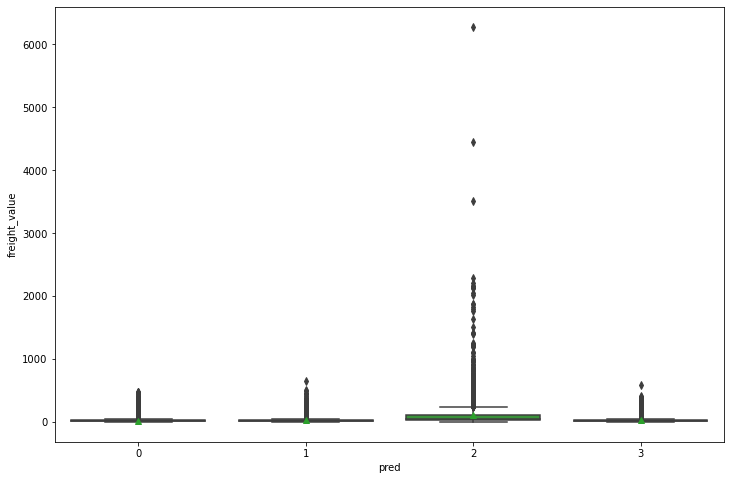





R :


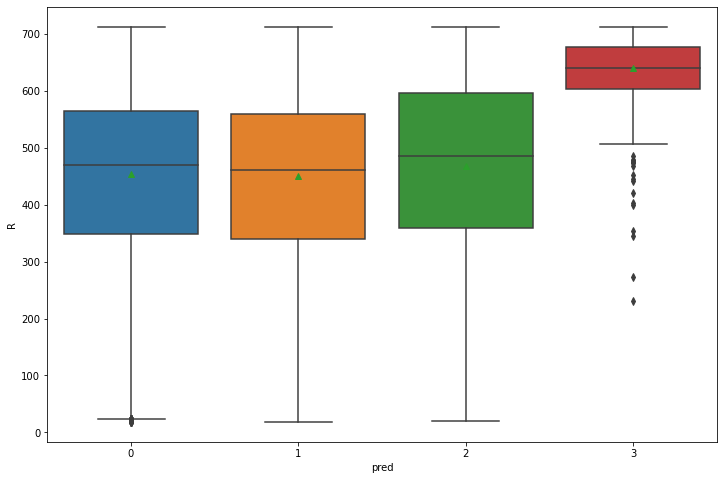





nb_days_order_approved :


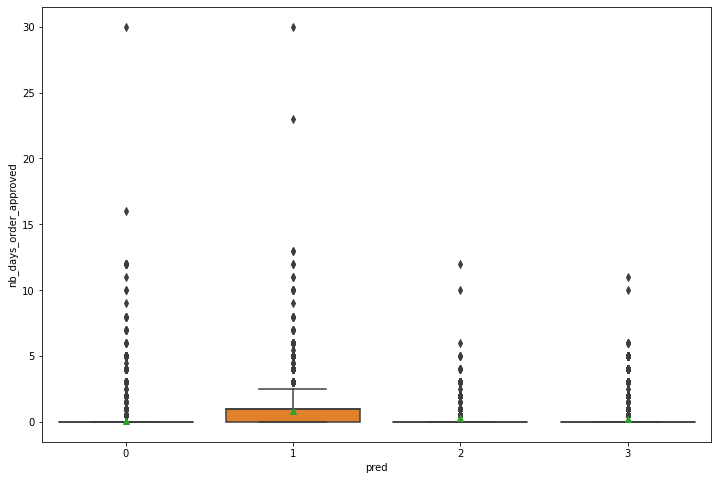





nb_days_delivered_carrier :


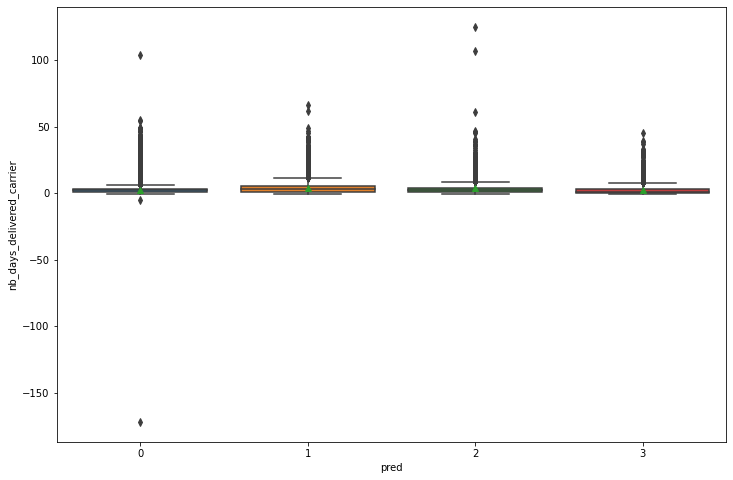





nb_days_delivered_customer :


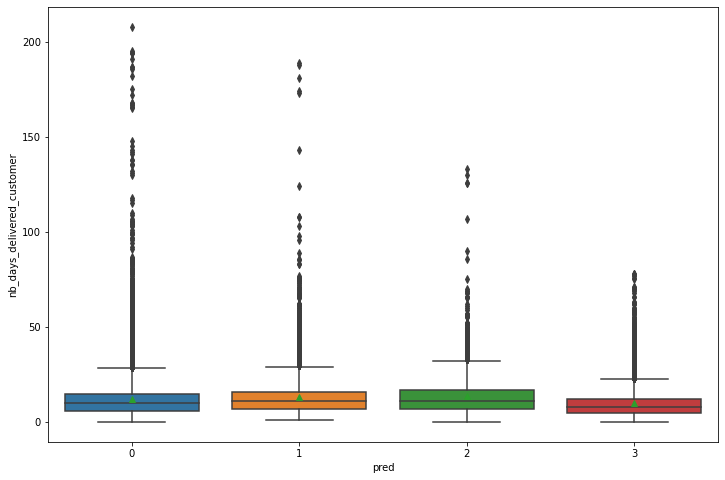





nb_days_estimate_delivery :


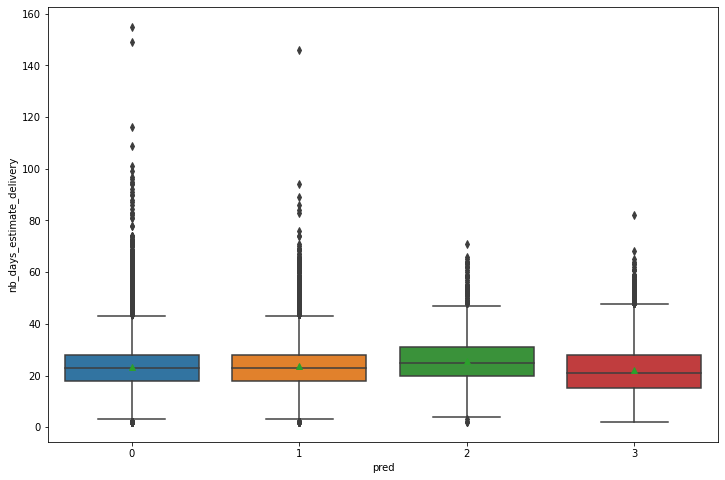





payment_sequential :


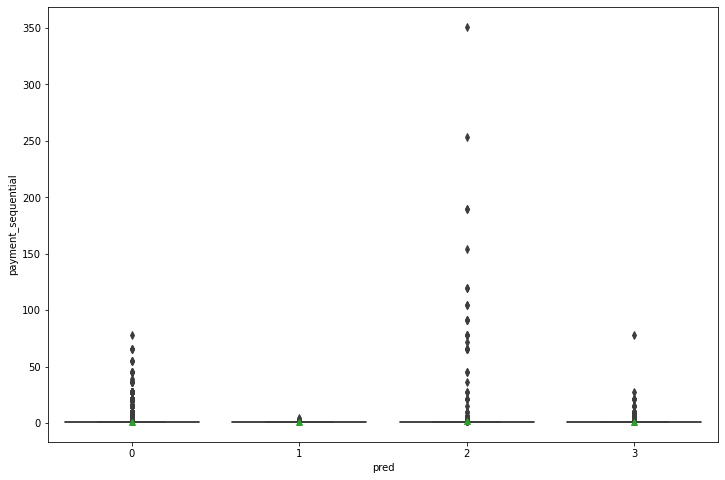





payment_installments :


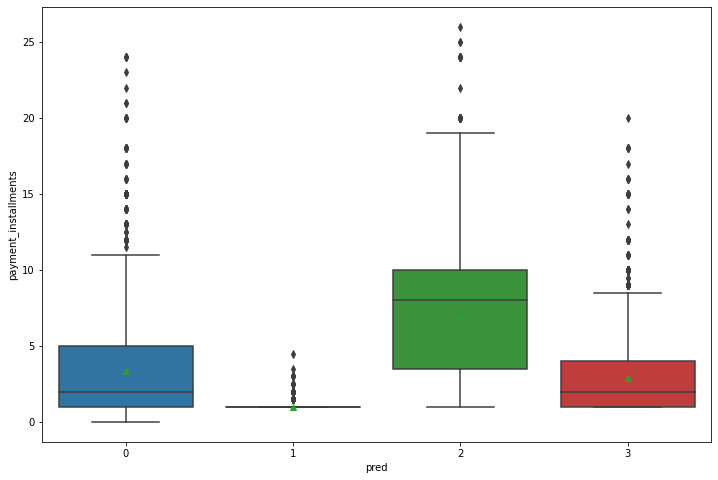





pay_boleto :


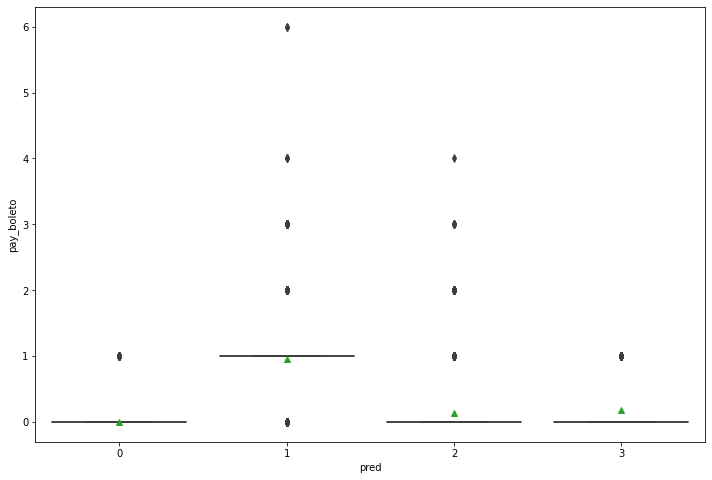





pay_credit_card :


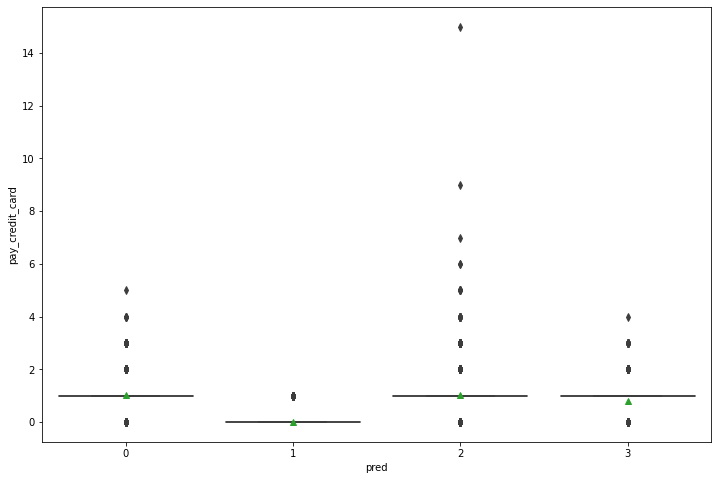





pay_debit_card :


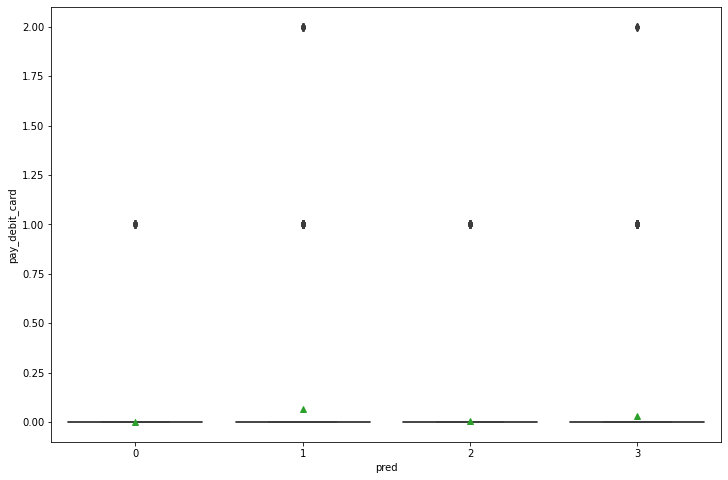





pay_voucher :


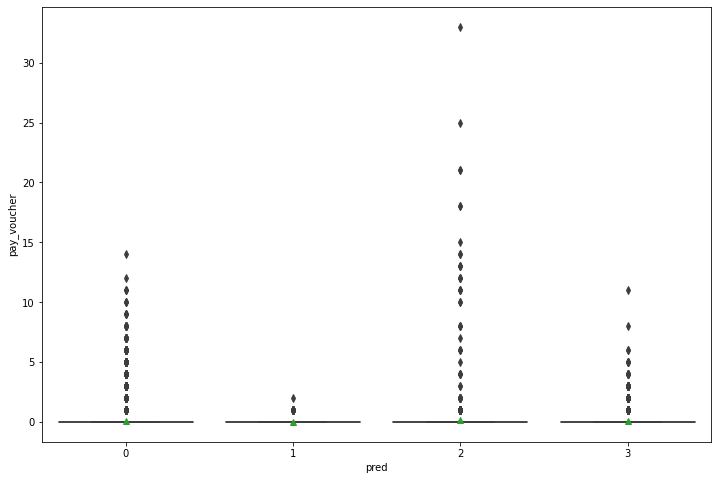





payment_value :


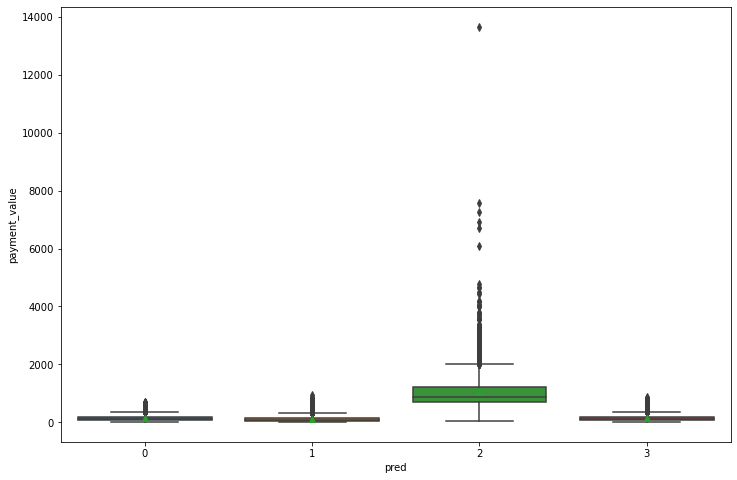





review_score :


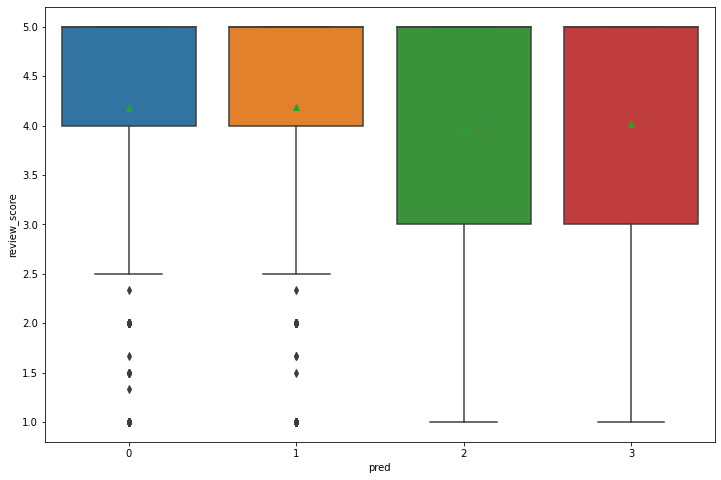





review_title :


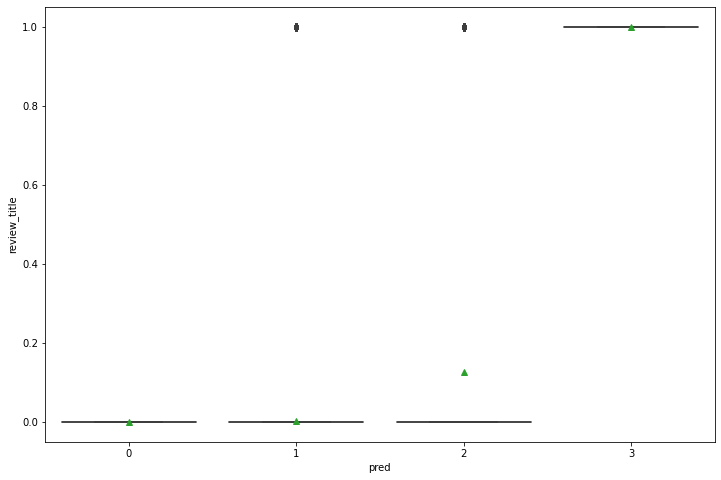





review_message :


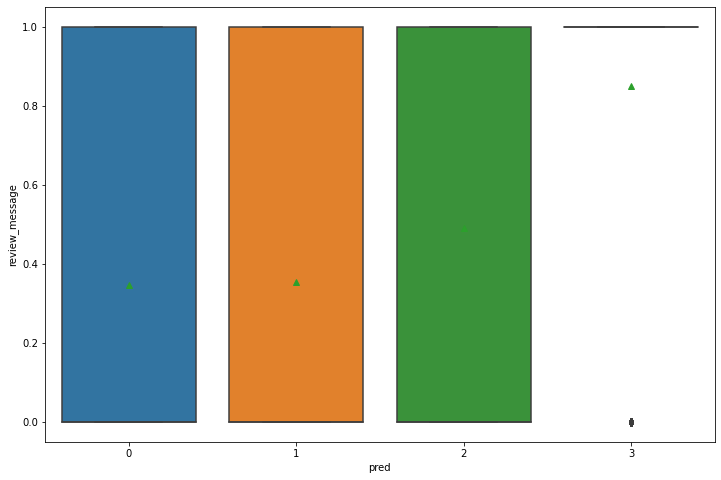





nb_days_survey_respond :


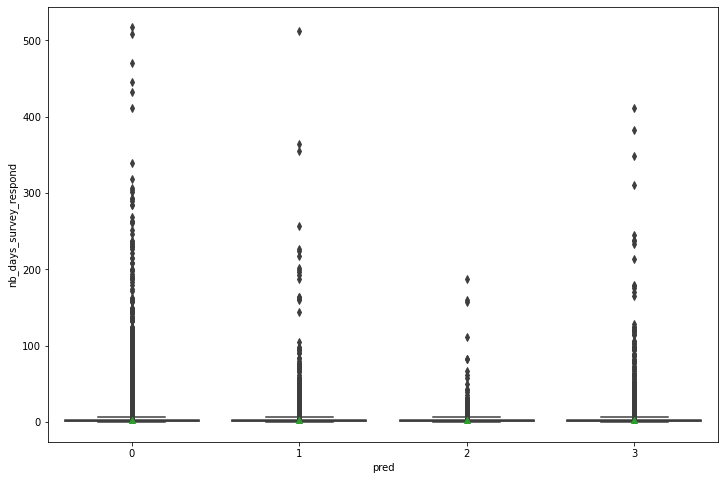





geolocation_lat :


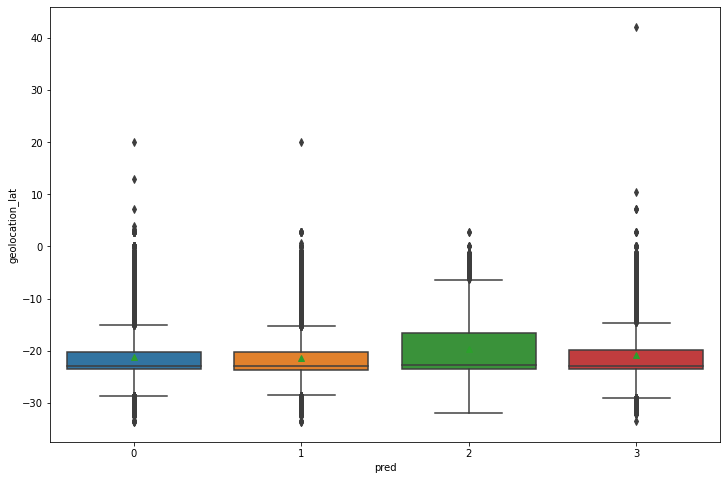





geolocation_lng :


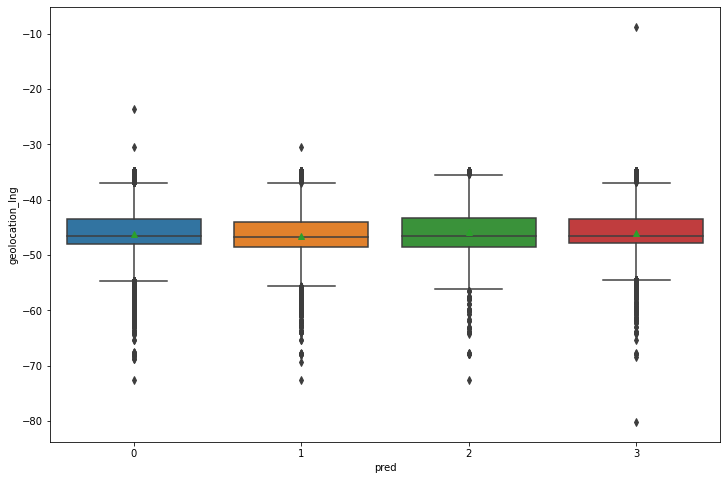





F :


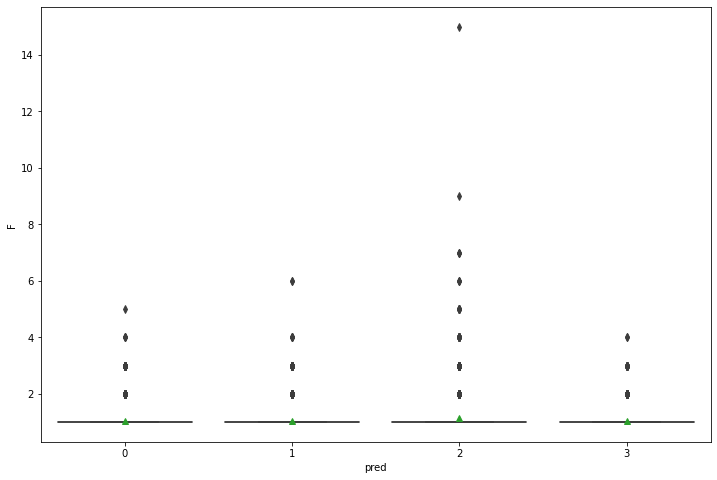





pred :


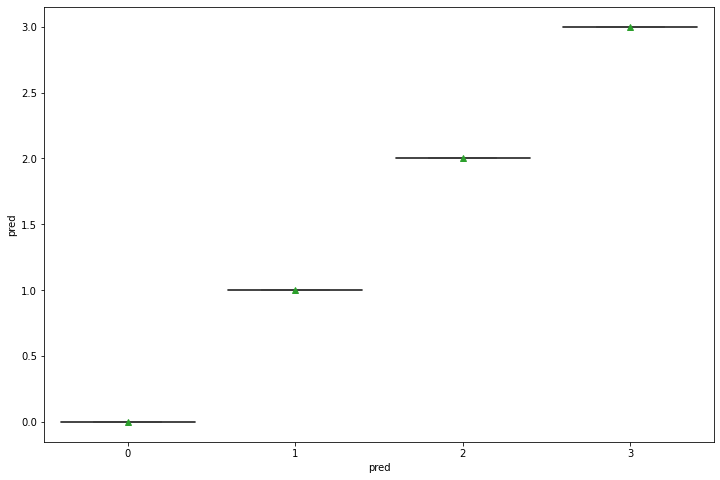

In [16]:
for column in df_graph:
    print(column, ':')
    plt.figure()
    sns.boxplot(x='pred', y=column, data=df_graph, showmeans=True)
    plt.show()
    
    print('\n'*3)

[]

<Figure size 864x576 with 0 Axes>

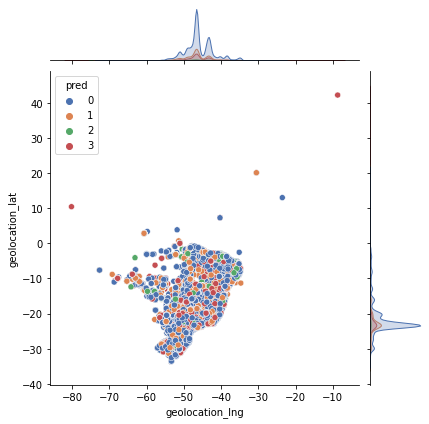

In [17]:
plt.figure()
sns.jointplot(x='geolocation_lng', 
              y='geolocation_lat', 
              data=df_graph, 
              hue='pred', 
              palette='deep')
plt.plot()

[]

<Figure size 864x576 with 0 Axes>

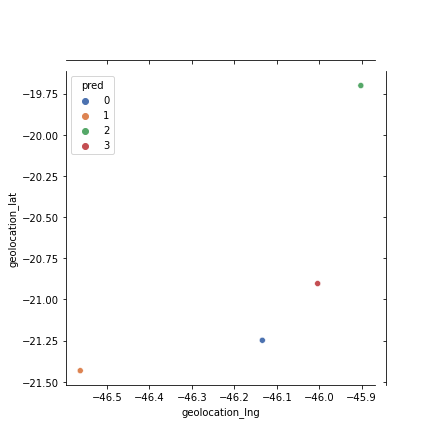

In [18]:
plt.figure()
sns.jointplot(x='geolocation_lng', 
              y='geolocation_lat', 
              data=df_graph_agg, 
              hue='pred', 
              palette='deep')
plt.plot()

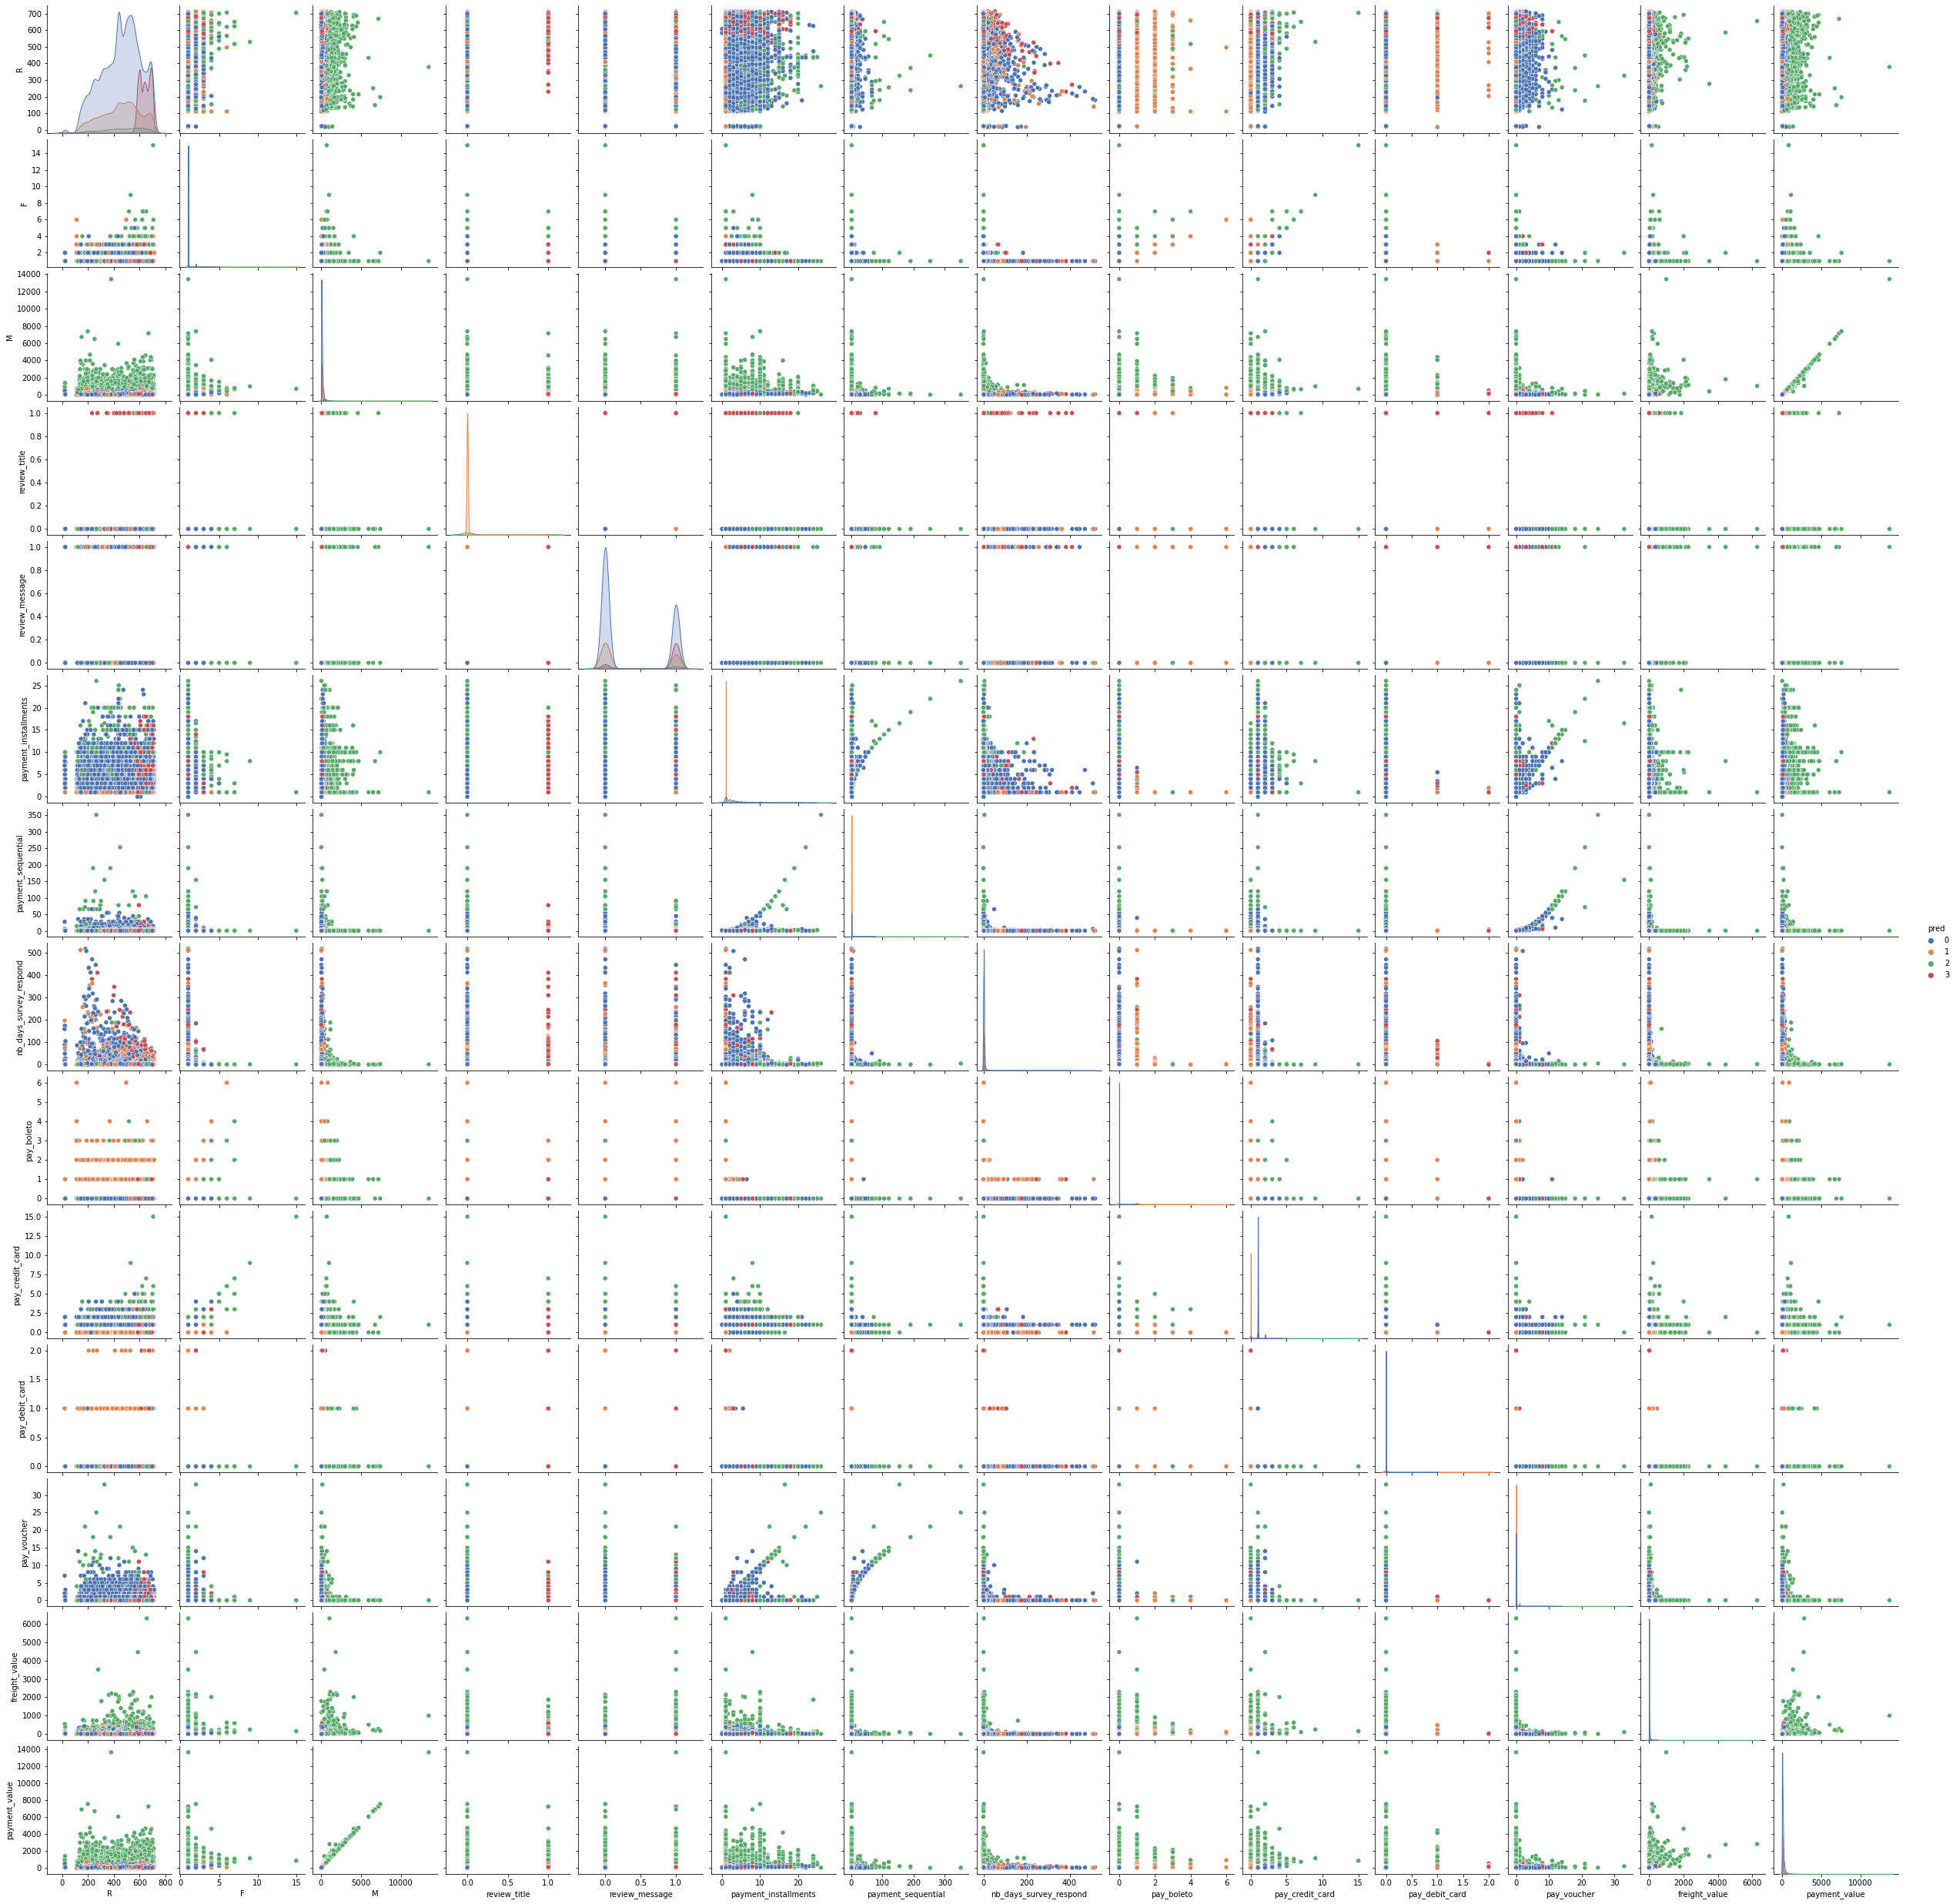

In [19]:
show_pairplot = True

if show_pairplot:
    sns.pairplot(data, hue='pred', palette='deep')

In [20]:
# stats per cluster
M_total = data['M'].sum()
nb_total = data.shape[0]

for group in df_graph_agg['pred'].unique():
    nb_customers = data['pred'][data['pred'] == group].count()
    M_group = data['M'][data['pred'] == group].sum()
    percent = round(100 * M_group / M_total)
    pop_percent = round(100*nb_customers/nb_total)
    
    print('group', group, ':',)
    print(f'\trevenue = {percent}%')
    print(f'\tpopulation = {pop_percent}%')
    print('\n')

group 0 :
	revenue = 54%
	population = 67%


group 1 :
	revenue = 14%
	population = 19%


group 2 :
	revenue = 22%
	population = 3%


group 3 :
	revenue = 10%
	population = 11%


